# Análise Exploratória de Dados

Dataset de avaliação de churn de clientes de Banco. Dados retirados do portal Kaggle, disponível em [Churn Modelling](https://https://www.kaggle.com/datasets/shubh0799/churn-modelling). Neste projeto, foi dado ao banco o nome fantasia de "Banco da Praça". Neste notebook encontra-se uma análise exploratória dos dados presentes no dataset.

### Importando pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importando dados e avaliando o dataset

In [2]:
df = pd.read_csv('/content/churn_modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.duplicated(subset=['CustomerId']).sum()

0

### Conservando features relevantes ao problema e descrição estatística dos dados

In [5]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
renomeia_colunas = {'CreditScore':'score_credito',
 'Geography':'pais',
 'Gender':'genero',
 'Age':'idade',
 'Tenure':'tempo',
 'Balance':'saldo',
 'NumOfProducts':'num_produtos',
 'HasCrCard':'tem_cartao',
 'IsActiveMember':'membro_ativo',
 'EstimatedSalary':'salario_estimado',
 'Exited':'saiu'
}

In [7]:
renomeia_pais = {'France':'França',
                 'Germany':'Alemanha',
                 'Spain':'Espanha'
                 }

In [8]:
df = df.rename(columns = renomeia_colunas)

In [9]:
df['pais'] = df['pais'].replace(renomeia_pais)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score_credito     10000 non-null  int64  
 1   pais              10000 non-null  object 
 2   genero            10000 non-null  object 
 3   idade             10000 non-null  int64  
 4   tempo             10000 non-null  int64  
 5   saldo             10000 non-null  float64
 6   num_produtos      10000 non-null  int64  
 7   tem_cartao        10000 non-null  int64  
 8   membro_ativo      10000 non-null  int64  
 9   salario_estimado  10000 non-null  float64
 10  saiu              10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.describe()

,score_credito,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado,saiu
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.to_csv('churndata_mod.csv', index= False)

### Dicionário dos dados

* score_credito representa o score de crédito de cada cliente e	vai de 350 a 850
* idade vai de 18 anos a 92
* o tempo mínimo como cliente é 0 e o máximo é 10 anos
* o saldo bancário mínimo é 0 e o máximo é \$250.898,09
* num_produtos representa o número de produtos bancários na carteira do cliente, que vai de 1 a 4
* tem_cartao representa por 0 se o cliente não tem cartão de crédito e 1 se tiver
* membro_ativo representa se o cliente consta como ativo se 1 e 0 senão
* salario_estimado é a variável que indica o salário estimado do cliente, sendo 11,58$ o mínimo e 199992.48$$ o máximo
* saiu indica em binário se o cliente deixou os serviços ou não



### Gráficos relevantes

In [ ]:
ordenado = df['pais'].value_counts().index

<ipython-input-14-19400cfeb877>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(df,x='pais',stat='percent',palette='Blues_r',order=ordenado)


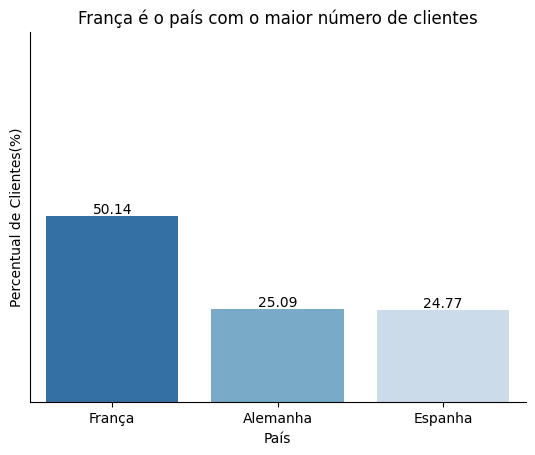

In [ ]:
a = sns.countplot(df,x='pais',stat='percent',palette='Blues_r',order=ordenado)
for container in a.containers:
  a.bar_label(container)
plt.title('França é o país com o maior número de clientes')
plt.xlabel('País')
plt.ylabel('Percentual de Clientes(%)')
plt.ylim(0,100)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
a.yaxis.set_ticks_position('none')
a.set_yticks([])
plt.show()

In [ ]:
country_count = df['pais'].value_counts().reset_index()
country_count.columns = ['País', 'Contagem']
country_count['iso_alpha']=['FRA','DEU','ESP']

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_geo(
    country_count,
    size='Contagem',
    locations='iso_alpha',
    hover_name='País',
    color='País',
    projection="natural earth2",
    title="País de Localização dos Clientes"
)

fig.show()

In [13]:
df_0 = df[df['saiu']==0]

In [14]:
df_1 = df[df['saiu']==1]

In [15]:
df_0.describe()

,score_credito,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado,saiu
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [16]:
df_1.describe()

,score_credito,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado,saiu
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


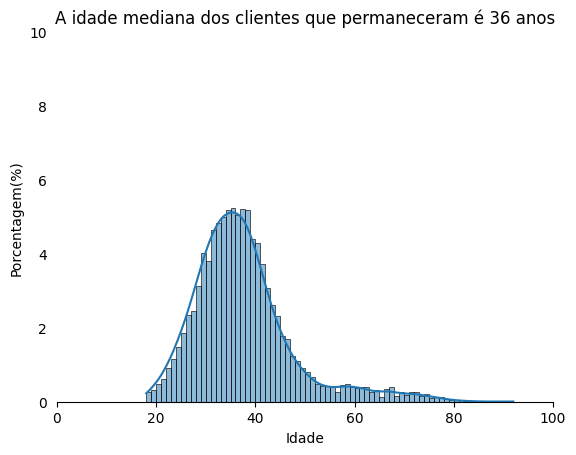

In [ ]:
b = sns.histplot(df_0,x='idade',stat='percent',kde=True)
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.title('A idade mediana dos clientes que permaneceram é 36 anos')
plt.ylabel('Porcentagem(%)')
plt.xlabel('Idade')
b.spines['top'].set_visible(False)
b.spines['right'].set_visible(False)
b.spines['left'].set_visible(False)
b.yaxis.set_ticks_position('none')
plt.show()

<ipython-input-23-7fb5f8f6aa6e>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



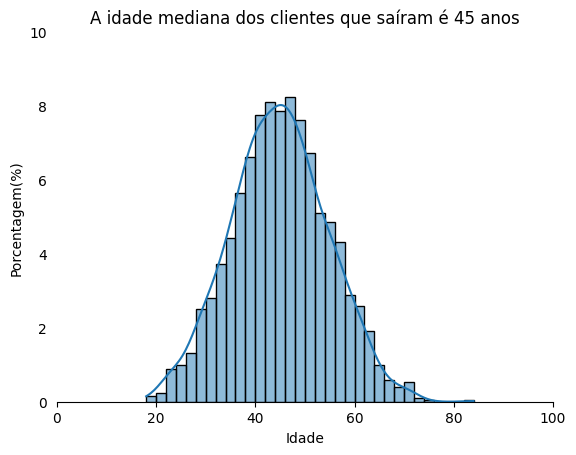

In [ ]:
c = sns.histplot(df_1,x='idade',stat='percent',kde=True,palette='Oranges_r')
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.title('A idade mediana dos clientes que saíram é 45 anos')
plt.ylabel('Porcentagem(%)')
plt.xlabel('Idade')
c.spines['top'].set_visible(False)
c.spines['right'].set_visible(False)
c.spines['left'].set_visible(False)
c.yaxis.set_ticks_position('none')
plt.show()

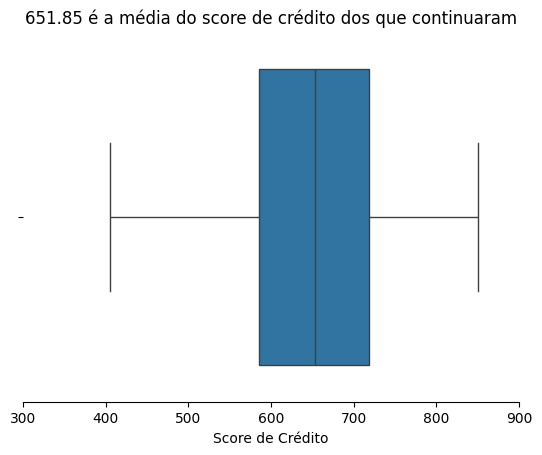

In [ ]:
d = sns.boxplot(df_0,x='score_credito')
plt.title('651.85 é a média do score de crédito dos que continuaram')
plt.xlabel('Score de Crédito')
plt.xlim(300,900)
d.spines['top'].set_visible(False)
d.spines['right'].set_visible(False)
d.spines['left'].set_visible(False)

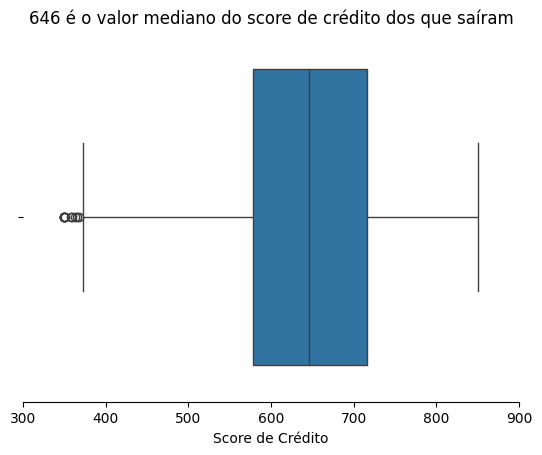

In [ ]:
e = sns.boxplot(df_1,x='score_credito')
plt.title('646 é o valor mediano do score de crédito dos que saíram')
plt.xlabel('Score de Crédito')
plt.xlim(300,900)
e.spines['top'].set_visible(False)
e.spines['right'].set_visible(False)
e.spines['left'].set_visible(False)

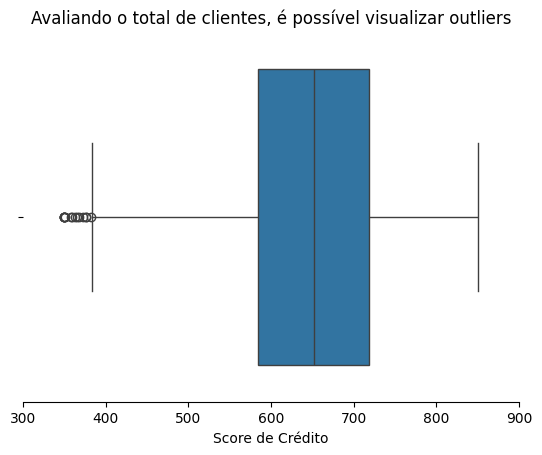

In [ ]:
i = sns.boxplot(df,x='score_credito')
plt.title('Avaliando o total de clientes, é possível visualizar outliers')
plt.xlabel('Score de Crédito')
plt.xlim(300,900)
i.spines['top'].set_visible(False)
i.spines['right'].set_visible(False)
i.spines['left'].set_visible(False)

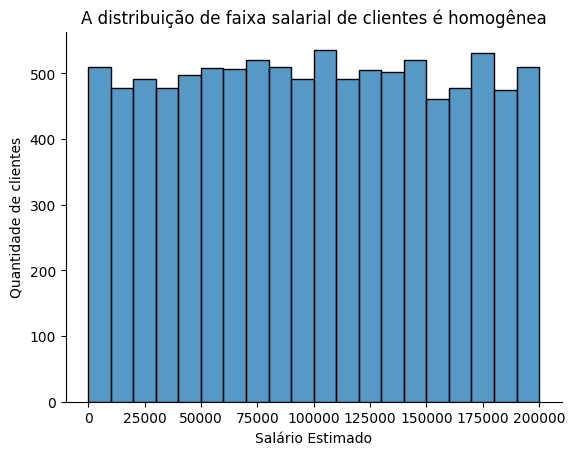

In [ ]:
f = sns.histplot(df,x='salario_estimado',bins=20)
plt.title('A distribuição de faixa salarial de clientes é homogênea')
plt.xlabel('Salário Estimado')
plt.ylabel('Quantidade de clientes')
f.spines['top'].set_visible(False)
f.spines['right'].set_visible(False)
plt.show()

<ipython-input-28-b04649a8cfe5>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




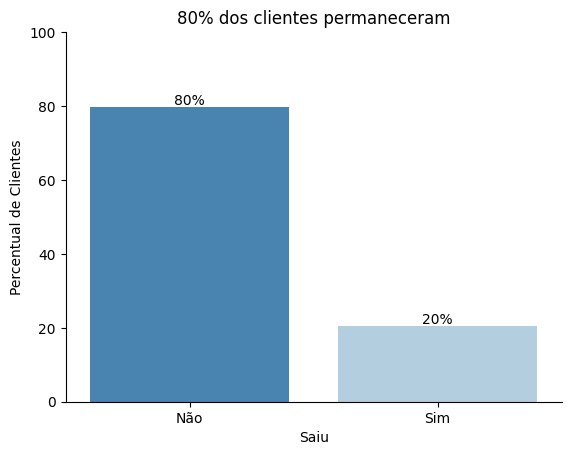

In [ ]:
g = sns.countplot(df, x='saiu',stat='percent',palette='Blues_r')
for container in g.containers:
  g.bar_label(container, labels=[f'{round(v)}%' for v in container.datavalues])
plt.title('80% dos clientes permaneceram')
plt.xticks([0,1],['Não','Sim'])
plt.xlabel('Saiu')
plt.ylabel('Percentual de Clientes')
plt.ylim(0,100)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()

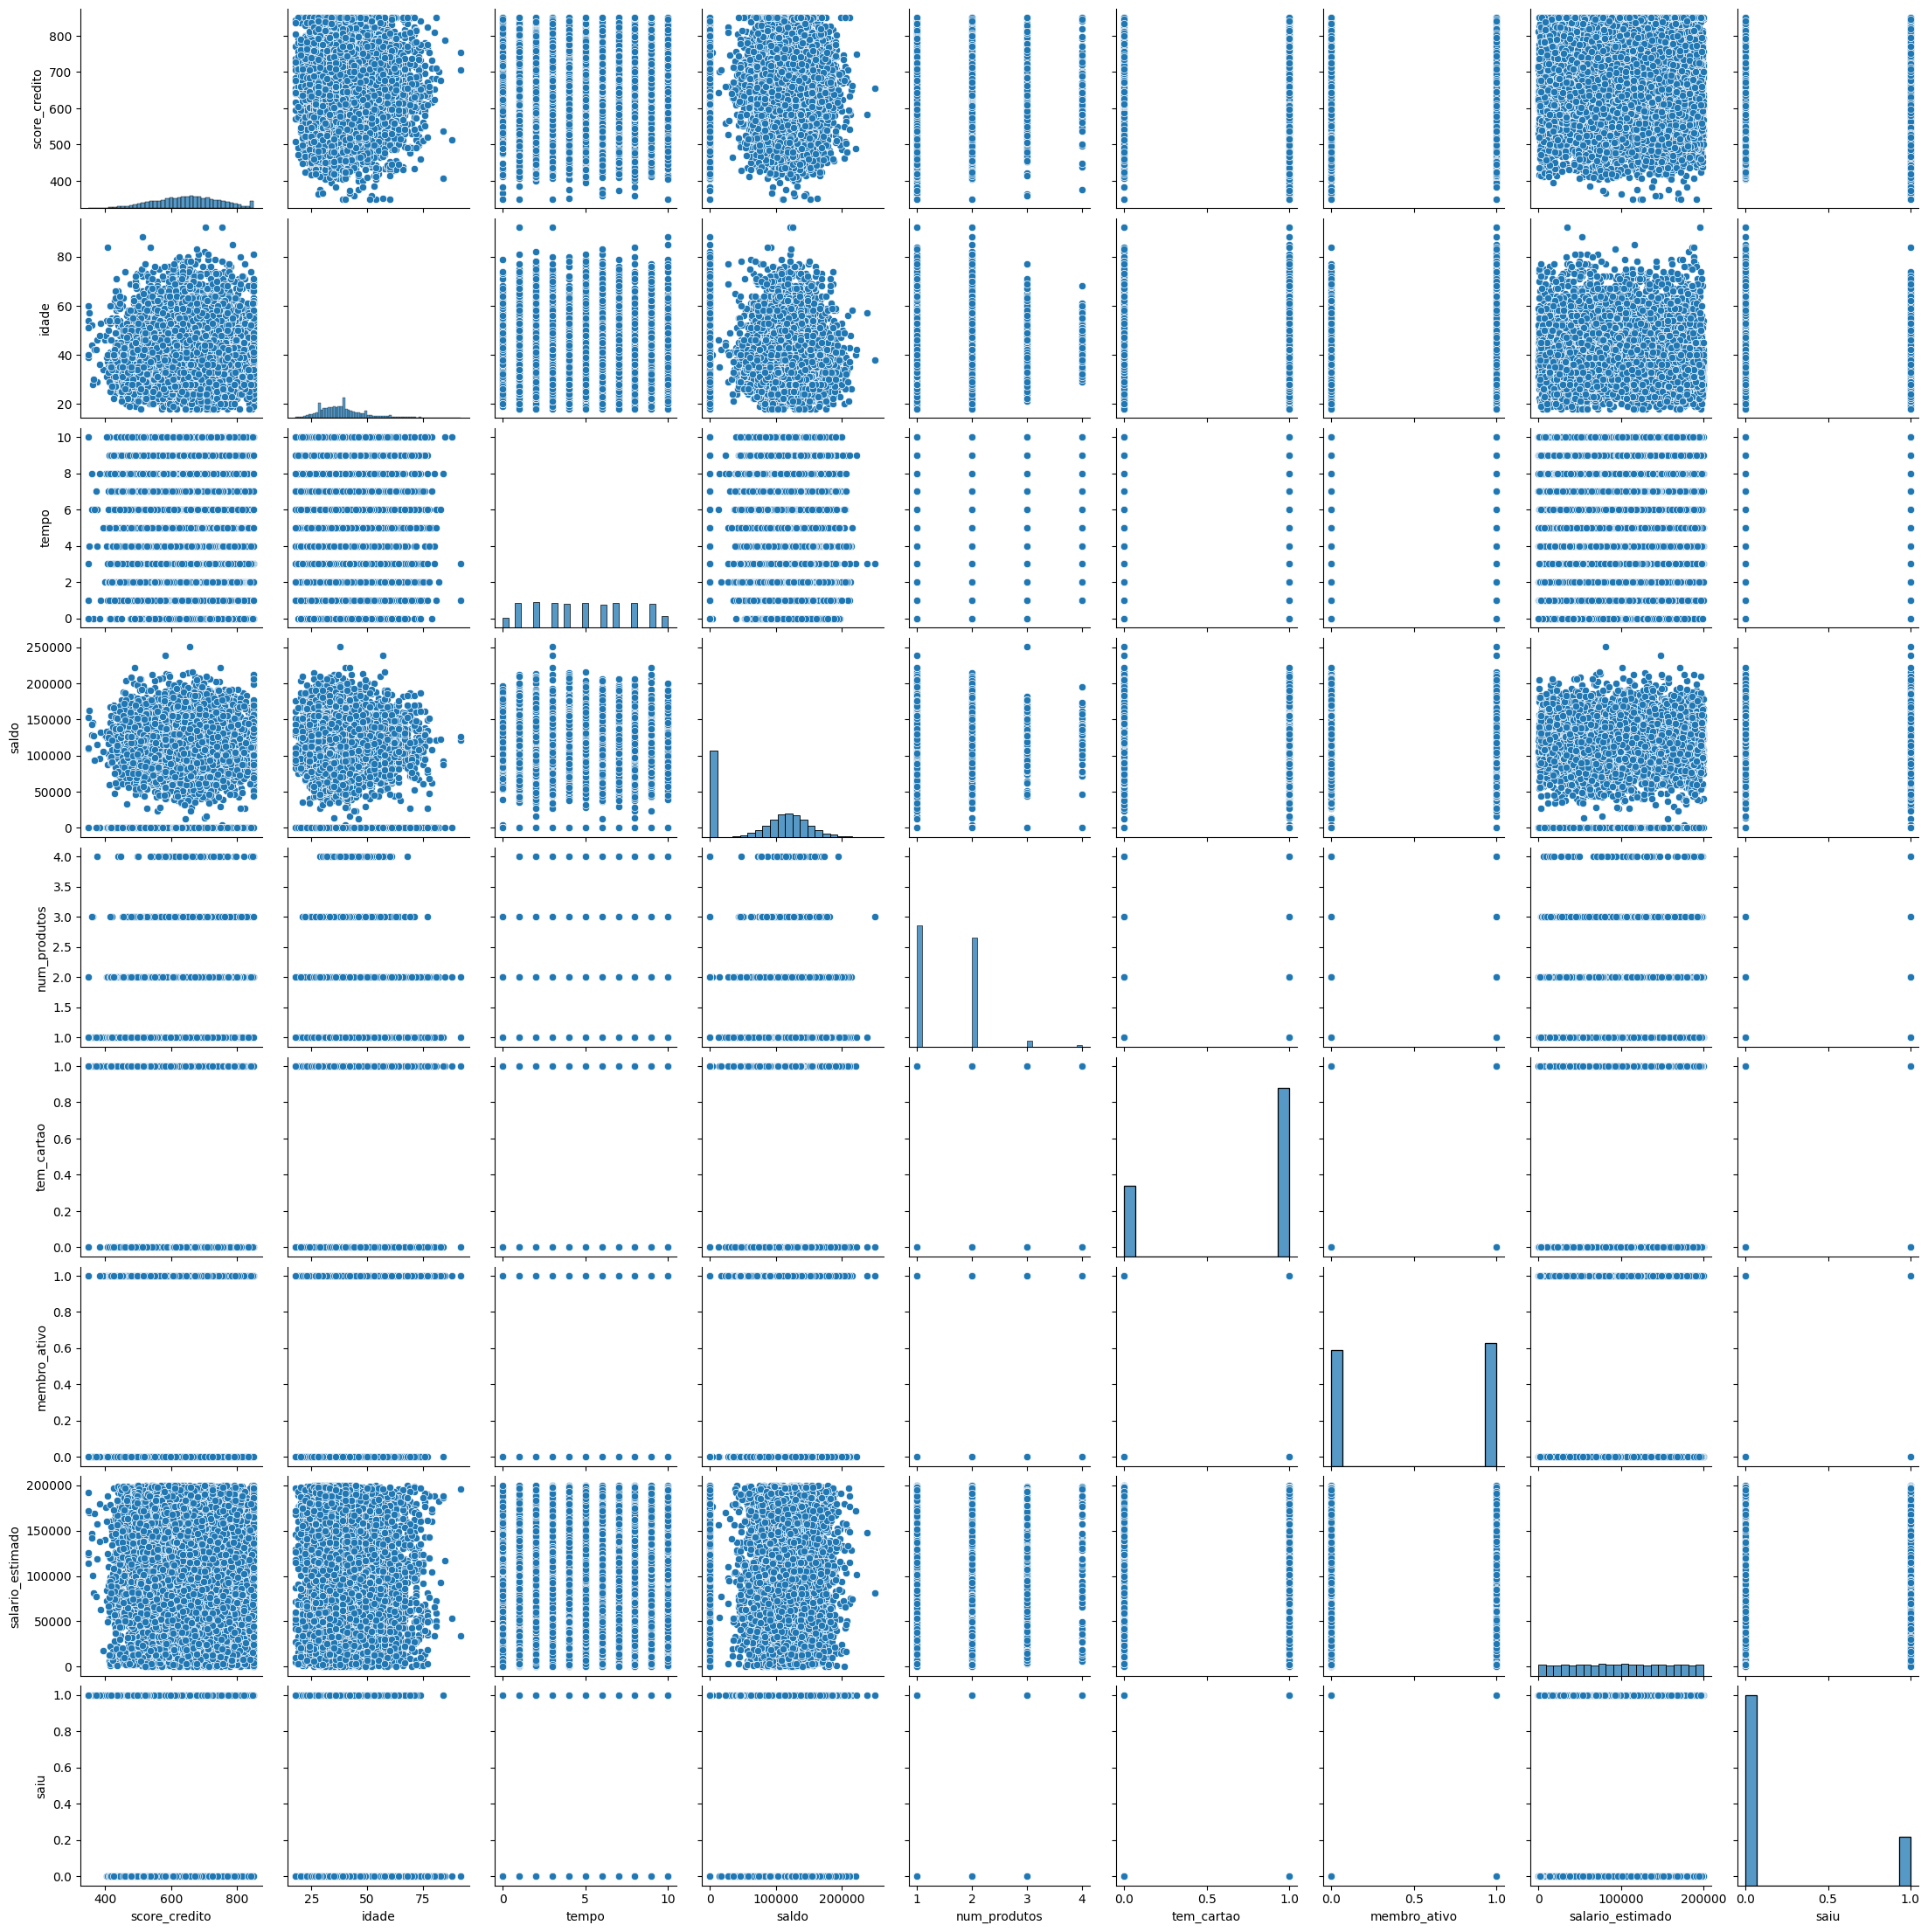

In [ ]:
h = sns.pairplot(df)

<ipython-input-30-9f47dba00e9e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




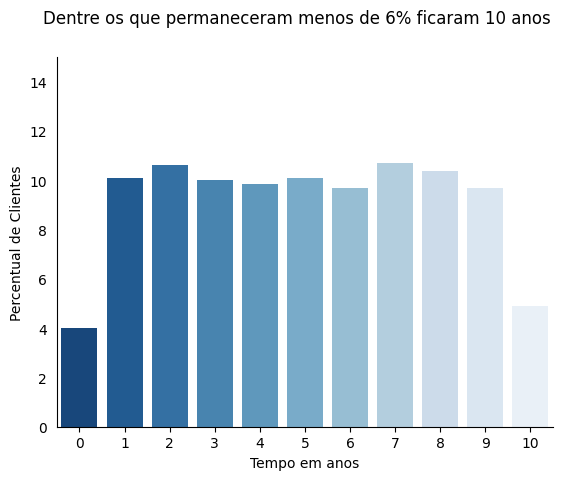

In [ ]:
j = sns.countplot(df_0, x='tempo',stat='percent',palette='Blues_r')
plt.suptitle('Dentre os que permaneceram menos de 6% ficaram 10 anos',fontsize=12)
plt.xlabel('Tempo em anos')
plt.ylabel('Percentual de Clientes')
plt.ylim(0,15)
j.spines['top'].set_visible(False)
j.spines['right'].set_visible(False)
j.yaxis.set_ticks_position('none')
plt.show()

<ipython-input-31-d2e4814849d0>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




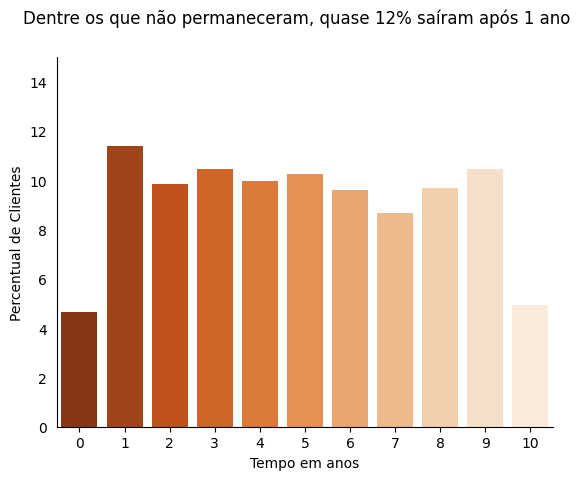

In [ ]:
k = sns.countplot(df_1, x='tempo',stat='percent',palette='Oranges_r')
plt.suptitle('Dentre os que não permaneceram, quase 12% saíram após 1 ano',fontsize=12)
plt.xlabel('Tempo em anos')
plt.ylabel('Percentual de Clientes')
plt.ylim(0,15)
k.spines['top'].set_visible(False)
k.spines['right'].set_visible(False)
k.yaxis.set_ticks_position('none')
plt.show()

<ipython-input-32-169063966fe4>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




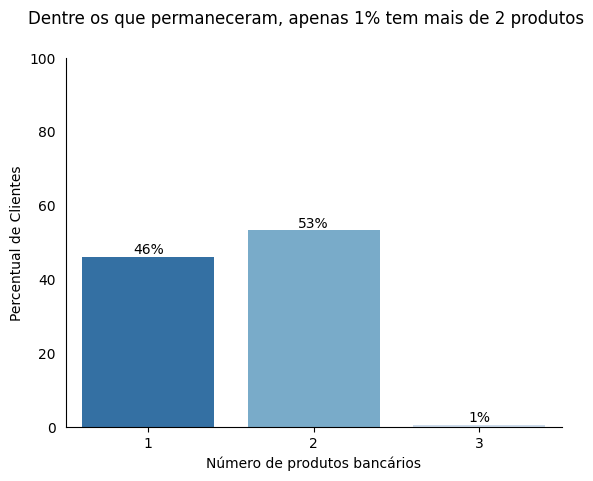

In [ ]:
l = sns.countplot(df_0, x='num_produtos',stat='percent',palette='Blues_r')
for container in l.containers:
  l.bar_label(container, labels=[f'{round(v)}%' for v in container.datavalues])
plt.suptitle('Dentre os que permaneceram, apenas 1% tem mais de 2 produtos',fontsize=12)
plt.xlabel('Número de produtos bancários')
plt.ylabel('Percentual de Clientes')
plt.ylim(0,100)
l.spines['top'].set_visible(False)
l.spines['right'].set_visible(False)
l.yaxis.set_ticks_position('none')
plt.show()

<ipython-input-33-117479d227a6>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




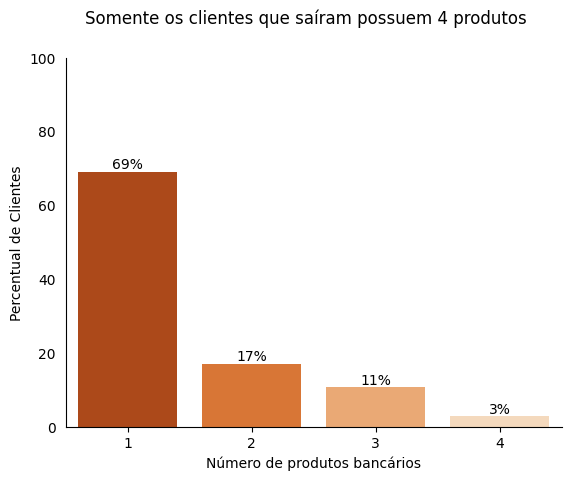

In [ ]:
m = sns.countplot(df_1, x='num_produtos',stat='percent',palette='Oranges_r')
for container in m.containers:
  m.bar_label(container, labels=[f'{round(v)}%' for v in container.datavalues])
plt.suptitle('Somente os clientes que saíram possuem 4 produtos',fontsize=12)
plt.xlabel('Número de produtos bancários')
plt.ylabel('Percentual de Clientes')
plt.ylim(0,100)
m.spines['top'].set_visible(False)
m.spines['right'].set_visible(False)
m.yaxis.set_ticks_position('none')
plt.show()

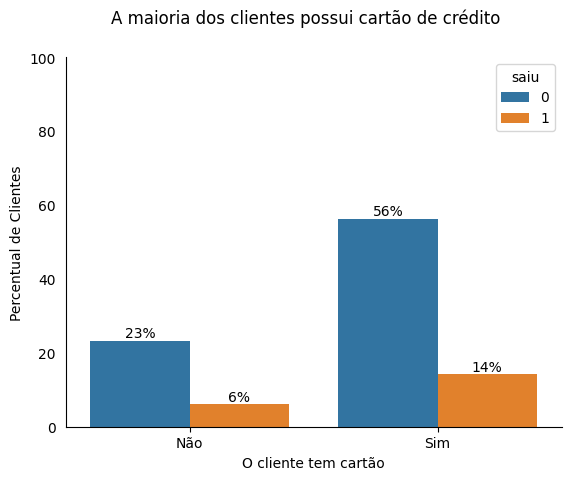

In [ ]:
n = sns.countplot(df, x='tem_cartao',stat='percent',hue='saiu')
for container in n.containers:
  n.bar_label(container, labels=[f'{round(v)}%' for v in container.datavalues])
plt.suptitle('A maioria dos clientes possui cartão de crédito',fontsize=12)
plt.xlabel('O cliente tem cartão')
plt.ylabel('Percentual de Clientes')
plt.xticks([0,1],['Não','Sim'])
plt.ylim(0,100)
n.spines['top'].set_visible(False)
n.spines['right'].set_visible(False)
n.yaxis.set_ticks_position('none')
plt.show()

In [17]:
from scipy.stats import mannwhitneyu


# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(df_0['saldo'], df_1['saldo'])

print(f'Estatística do teste: {stat}')
print(f'Valor p: {p_value}')

# Verificando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: As distribuições são diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há evidência suficiente para dizer que as distribuições são diferentes.")


Estatística do teste: 6849444.5
Valor p: 1.1158399379149222e-28
Rejeitamos a hipótese nula: As distribuições são diferentes.


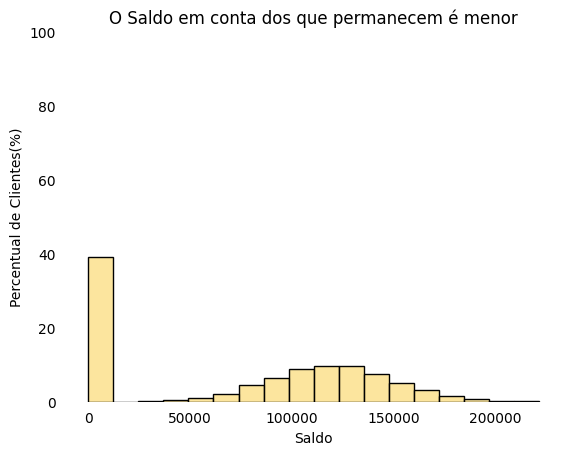

In [ ]:
o = sns.histplot(df_0,x='saldo',stat='percent', color='#FBDD7E')
plt.title('O Saldo em conta dos que permanecem é menor')
plt.xlabel('Saldo')
plt.ylabel('Percentual de Clientes(%)')
plt.ylim(0, 100)
o.spines['top'].set_visible(False)
o.spines['right'].set_visible(False)
o.spines['left'].set_visible(False)
o.spines['bottom'].set_visible(False)
o.xaxis.set_ticks_position('none')  # não mostra os ticks no eixo x
o.yaxis.set_ticks_position('none')
plt.show()

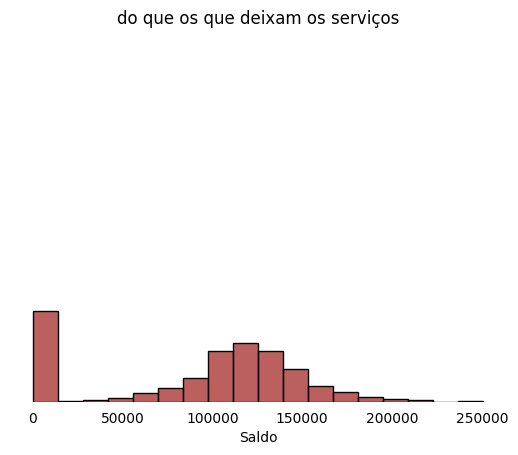

In [ ]:
p = sns.histplot(df_1,x='saldo',stat='percent', color='#A52A2A')
plt.title('do que os que deixam os serviços')
plt.xlabel('Saldo')
plt.ylabel('')
plt.ylim(0, 100)
p.spines['top'].set_visible(False)
p.spines['right'].set_visible(False)
p.spines['left'].set_visible(False)
p.spines['bottom'].set_visible(False)
p.xaxis.set_ticks_position('none')  # não mostra os ticks no eixo x
p.set_yticks([])
plt.show()

In [ ]:
numeric = df.drop(columns=['genero', 'pais'])

In [ ]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,score_credito,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado,saiu
score_credito,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
idade,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tempo,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
saldo,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_produtos,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
tem_cartao,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
membro_ativo,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
salario_estimado,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
saiu,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Há uma correlação positiva entre a saída de clientes e as variáveis idade, saldo e salário estimado.